#**Final Exam - 0002**


In [1]:
import gdown

files = {
    '1kb9IWLQpH-KkkDiD6EhjgXr7gcxX8xei': 'bfs_dfs.csv',
    '11wcxZ4o8IcxInM1uAtCzK8Jlhc4L-QBU': 'input.csv',
    '1VFOrij_lpUZWrDymB_UQcFq7TMZAS7ga': 'output.csv',
    '1qYh4cdwoYPFHrhUetJ0uSoh-45PoWv7f': 'Countries.csv'
}

for file_id, file_name in files.items():
    gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", file_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1kb9IWLQpH-KkkDiD6EhjgXr7gcxX8xei
To: /content/bfs_dfs.csv
100%|██████████| 42.0/42.0 [00:00<00:00, 118kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=11wcxZ4o8IcxInM1uAtCzK8Jlhc4L-QBU
To: /content/input.csv
100%|██████████| 2.31k/2.31k [00:00<00:00, 6.79MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1VFOrij_lpUZWrDymB_UQcFq7TMZAS7ga
To: /content/output.csv
100%|██████████| 476/476 [00:00<00:00, 1.29MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1qYh4cdwoYPFHrhUetJ0uSoh-45PoWv7f
To: /content/Countries.csv
100%|██████████| 7.00k/7.00k [00:00<00:00, 13.8MB/s]


#**Câu 1 (3 điểm)**
Cho bài toán như sau: Trong các lâu đài cổ người ta thường xây dựng các đường hầm bí mật để thoát hiểm trong các trường hợp khẩn cấp. Các đường hầm chỉ có thể vào từ một cửa vào duy nhất tại phòng Trung tâm và thoát ra ở rất nhiều cửa ra. Các cửa ra đều nằm ở rìa lâu đài, do vậy, nếu thoát ra được rìa lâu đài thì coi như đã thoát hiểm. Để ngụy trang, người ta cho đào nhiều nhánh hầm cụt và cửa vào giả. Ngoài ra, để tăng khả năng thoát hiểm, người ta còn xây dựng các đường hầm giao nhau tại một số vị trí. Để nghiệm thu công trình, chủ lâu đài cần kiểm tra xem từ phòng trung tâm có thể thoát hiểm qua hệ thống đường hầm hay không.  Hãy sử dụng thuật toán DFS giúp chủ lâu đài kiểm tra hệ thống trên. Biết rằng lâu đài là một hình vuông được chia lưới ô vuông gồm n dòng, n cột. Trên đồ hoạ, ô ở dòng i cột j được ghi số 1 nếu có đường hầm, số 0 nếu không có (ô ở góc trên trái có toạ độ (0,0)). 2 ô chỉ có thể thông nhau nếu chúng có chung cạnh.
Dữ liệu nhập vào từ tập tin văn bản “bfs_dfs.csv” gồm:
- Dòng đầu chứa 3 số nguyên dương n < 30,  D và  C ( trong đó D, C là dòng và cột của phòng trung tâm).
- n dòng tiếp theo, mỗi dòng chứa n số là các số ở các vị trí tương ứng trên họa đồ.
Kết quả tìm được ghi ra tập tin văn bản “bfs_dfs_out.csv”. Dòng đầu chứa số m là số ô phải đi qua, nếu không thoát được thì m = -1. Trong trường hợp thoát được, m dòng tiếp theo: mỗi dòng chứa 2 số là số hiệu dòng cột của các ô phải đi qua theo đúng trình tự của một cách thoát hiểm.

Ví dụ:  


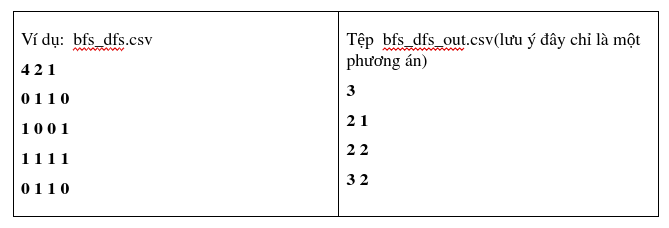

In [81]:
import pandas as pd

def prepare_data(filename):
    df = pd.read_csv(filename, header=None, delimiter=',')
    # Handle NaN
    df = df.dropna(axis=1, how='all')

    n, D, C = map(int, df.iloc[0].dropna().astype(float))
    grid = df.iloc[1:].fillna(0).astype(int).values

    return n, D, C, grid
n, D, C, grid = prepare_data('bfs_dfs.csv')
print(n)
print(D)
print(C)
print(grid)

4
2
1
[[0 1 1 1]
 [1 0 0 1]
 [1 1 1 1]
 [0 1 1 0]]


In [102]:


def dfs(grid, start, visited):
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    stack = [start]
    path = []

    while stack:
        current = stack.pop()
        if current in visited:
            continue
        visited.append(current)
        path.append(current)
        r, c = current

        if r == 0 or c == 0 or r == n - 1 or c == n - 1:
            return path

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < n and 0 <= nc < n and grid[nr][nc] == 1 and (nr, nc) not in visited:
                stack.append((nr, nc))
    return []

In [103]:
from collections import deque

def bfs(grid, start):
    n = len(grid)
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
    queue = deque([start])
    visited = set()
    path = []

    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)
        path.append(current)
        r, c = current

        if r == 0 or c == 0 or r == n - 1 or c == n - 1:
            return path

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < n and 0 <= nc < n and grid[nr][nc] == 1 and (nr, nc) not in visited:
                queue.append((nr, nc))
    return []

In [104]:
n, D, C, grid = prepare_data('bfs_dfs.csv')
visited = []
escape_path = dfs(grid, (D, C), visited)

print(escape_path)
print(visited)

with open('dfs_out.csv', 'w') as f:
    if escape_path:
        f.write(f"{len(escape_path)}\n")
        for r, c in escape_path:
            f.write(f"{r} {c}\n")
    else:
        f.write("-1\n")

[(2, 1), (2, 0)]
[(2, 1), (2, 0)]


In [106]:
n, D, C, grid = prepare_data('bfs_dfs.csv')
escape_path = bfs(grid, (D, C))

print(escape_path)

with open('bfs_out.csv', 'w') as f:
    if escape_path:
        f.write(f"{len(escape_path)}\n")
        for r, c in escape_path:
            f.write(f"{r} {c}\n")
    else:
        f.write("-1\n")

[(2, 1), (2, 2), (3, 1)]


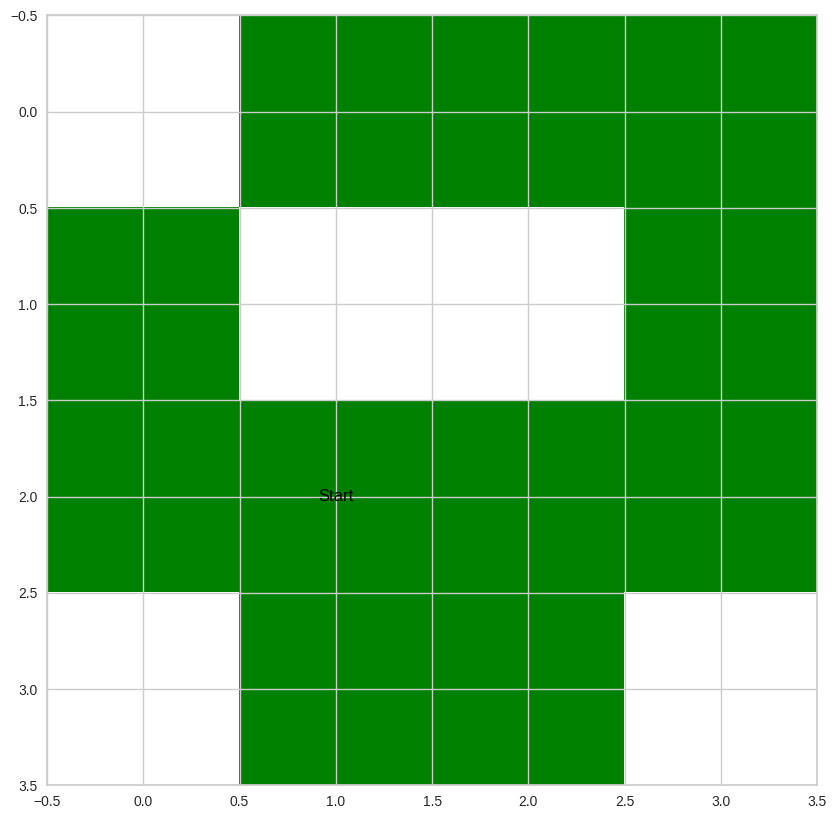

In [94]:
def visualize_path(grid, path):
    n = len(grid)
    vis_grid = np.array(grid)

    fig, ax = plt.subplots(figsize=(10, 10))

    colors = ['white', 'blue', 'green', 'red']  # Define colors for different values
    cmap = plt.cm.colors.ListedColormap(colors)
    norm = plt.cm.colors.BoundaryNorm(boundaries=[-1, 0, 1, 2, 3], ncolors=4)

    # Masking 0 values to not display them
    masked_grid = np.ma.masked_where(vis_grid == 0, vis_grid)
    img = ax.imshow(masked_grid, cmap=cmap, norm=norm, interpolation='none')

    start_r, start_c = path[0]
    vis_grid[start_r, start_c] = 1  # Mark the start point with another special value
    masked_grid = np.ma.masked_where(vis_grid == 0, vis_grid)
    img.set_array(masked_grid)
    ax.text(start_c, start_r, 'Start', color='black', ha='center', va='center')

    step = [0]  # Mutable step counter to be updated in the key press event

    def on_key(event):
        if event.key == 'right' and step[0] < len(path):
            r, c = path[step[0]]
            vis_grid[r, c] = 2  # Mark the path with a different special value
            masked_grid = np.ma.masked_where(vis_grid == 0, vis_grid)
            img.set_array(masked_grid)
            ax.set_title(f"Step {step[0] + 1}: ({r}, {c})")
            step[0] += 1
            fig.canvas.draw()

    fig.canvas.mpl_connect('key_press_event', on_key)
    plt.show()

# Example usage:
n, D, C, grid = prepare_data('bfs_dfs.csv')
visited = []
escape_path = dfs(grid, (D, C), visited)
visualize_path(grid, escape_path)

#**Câu 2 (4 điểm)**
Cho tập dữ liệu input.csv với 75 mẫu dữ liệu, mỗi mẫu có 4 đặc trưng ( chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa, chiều rộng cánh hoa) và tên loài hoa tương ứng.
(2 điểm) Hãy viết chương trình phân loại hoa trên cơ sở dùng Logistic Regression kết hợp với lớp softmax.

a) (3 điểm) Hãy viết chương trình phân loại hoa sử dụng Logistic Regression kết hợp với lớp softmax. Nêu rõ mô hình thức phân loại trong chương trình như thế nào (Ví dụ: có bao nhiêu tế bào nơ-ron, mỗi nơ-ron phụ trách công việc gì, làm sao để phân loại,…)?

b) (1 điểm) Hãy thực thi chương trình và cho biết nhãn của 30 mẫu dữ liệu trong output.csv

In [5]:
import pandas as pd
import numpy as np

input_df = pd.read_csv('input.csv')
input_df.columns = ['ft1', 'ft2', 'ft3', 'ft4', 'label']
input_df

,ft1,ft2,ft3,ft4,label
0,5.5,3.5,1.3,0.2,Iris-setosa
1,4.9,3.1,1.5,0.1,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,5.1,3.4,1.5,0.2,Iris-setosa
4,5.0,3.5,1.3,0.3,Iris-setosa
...,...,...,...,...,...
69,6.7,3.0,5.2,2.3,Iris-virginica
70,6.3,2.5,5.0,1.9,Iris-virginica
71,6.5,3.0,5.2,2.0,Iris-virginica
72,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
label_counts = input_df['label'].value_counts()
print(label_counts)
print(np.unique(input_df['label']))

label
Iris-versicolor    30
Iris-virginica     30
Iris-setosa        14
Name: count, dtype: int64
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    features = df.iloc[:, :-1].values
    targets = df.iloc[:, -1].values

    targets = LabelEncoder().fit_transform(targets)

    return features, targets

In [8]:
X, y = prepare_data(input_df)
# bias
X = np.hstack((np.ones((X.shape[0], 1)), X))
# print(X)
# print(y)

In [9]:
# Utils
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(logp) / n_samples
    return loss

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [10]:
# hyper-params
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
learning_rate = 0.01
n_iterations = 1000

# weights
W = np.zeros((n_features, n_classes))

# training
for i in range(n_iterations):
    scores = np.dot(X, W)
    probs = softmax(scores)
    y_pred = np.argmax(probs, axis=1)
    # gradient descent
    gradient = (1 / n_samples) * np.dot(X.T, probs - np.eye(n_classes)[y])
    W -= learning_rate * gradient
    # acc and loss
    if (i + 1) % 100 == 0:
        loss = cross_entropy_loss(y, probs)
        acc = accuracy(y, y_pred)
        print(f'iter: {i + 1}, accuracy: {acc:.2f}, loss: {loss:.2f}')

iter: 100, accuracy: 0.55, loss: 0.79
iter: 200, accuracy: 0.76, loss: 0.68
iter: 300, accuracy: 0.84, loss: 0.61
iter: 400, accuracy: 0.89, loss: 0.57
iter: 500, accuracy: 0.91, loss: 0.53
iter: 600, accuracy: 0.93, loss: 0.51
iter: 700, accuracy: 0.93, loss: 0.48
iter: 800, accuracy: 0.93, loss: 0.46
iter: 900, accuracy: 0.95, loss: 0.45
iter: 1000, accuracy: 0.95, loss: 0.43


In [11]:
final_probs = softmax(np.dot(X, W))
final_predictions = np.argmax(final_probs, axis=1)

final_acc = accuracy(y, final_predictions)
print(f'Final accuracy: {final_acc:.2f}')

Final accuracy: 0.95


In [12]:
output_df = pd.read_csv('output.csv')
output_df.columns = ['ft1', 'ft2', 'ft3', 'ft4']
output_df

,ft1,ft2,ft3,ft4
0,4.8,3.4,1.6,0.2
1,4.8,3.0,1.4,0.1
2,4.3,3.0,1.1,0.1
3,5.8,4.0,1.2,0.2
4,5.7,4.4,1.5,0.4
5,5.4,3.9,1.3,0.4
6,5.1,3.5,1.4,0.3
7,5.7,3.8,1.7,0.3
8,5.1,3.8,1.5,0.3
9,7.0,3.2,4.7,1.4


In [56]:
X_test = output_df.values

X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

test_scores = np.dot(X_test, W)
test_probs = softmax(test_scores)
test_predictions = np.argmax(test_probs, axis=1)

print(test_predictions)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]


#**Câu 2 (hidden layers)**

**Giải thích:**

Mã hóa các nhãn thành số nguyên bằng LabelEncoder.

X (Ma trận chứa các đặc trưng) tăng thêm 1 cột bias. Tạo Weight W1 và W2 với b1 và b2 ngẫu nhiên rất nhỏ.

Forward Propagation: X*W1 + b1 = Z1.

Z1 đi qua hàm ReLU (hàm kích hoạt, f(x) = max(0, x)), ra A1. Sau đó, A1*W2 + b2 = Z2. Z2 đi qua hàm softmax (softmax(zi) = e^zi/sigma(e^z) với i là index từng lớp) tạo ra 1 vector chứa xác xuất mà X thuộc về các lớp.

Tính Cross-Entropy Loss = - sigma(labeli*log(predicti)) với predicti chính là softmax(zi).

Backward Propagation: gradient của loss với W1, W2, b1 và b2, sau đó cập nhật ngược lại để tiếp tục tối thiểu hàm loss.

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    features = df.iloc[:, :-1].values
    targets = df.iloc[:, -1].values

    targets = LabelEncoder().fit_transform(targets)

    return features, targets

input_df = pd.read_csv('input.csv')
input_df.columns = ['ft1', 'ft2', 'ft3', 'ft4', 'label']
X, y = prepare_data(input_df)
# bias
X = np.hstack((np.ones((X.shape[0], 1)), X))

n_classes = len(np.unique(y))
n_features = X.shape[1]
n_hidden = 10  # Nút trong lớp ẩn

W1 = np.random.randn(n_features, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_classes) * 0.01
b2 = np.zeros((1, n_classes))

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    log_likelihood = -np.log(Y_hat[range(m), Y])
    loss = np.sum(log_likelihood) / m
    return loss

def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=1), A2

learning_rate = 0.1
n_iterations = 2000

for i in range(n_iterations):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    if (i + 1) % 200 == 0:
        loss = compute_loss(y, A2)
        predictions, _ = predict(X, W1, b1, W2, b2)
        accuracy = np.mean(predictions == y)
        print("Iteration {}: Loss {:.4f}, Accuracy {:.2f}%".format(i + 1, loss, accuracy * 100))

    # Backward propagation
    dZ2 = A2
    dZ2[range(X.shape[0]), y] -= 1
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 > 0)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # Update weights
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

Iteration 200: Loss 0.4353, Accuracy 75.68%
Iteration 400: Loss 0.2414, Accuracy 87.84%
Iteration 600: Loss 0.1491, Accuracy 93.24%
Iteration 800: Loss 0.1536, Accuracy 91.89%
Iteration 1000: Loss 0.1191, Accuracy 94.59%
Iteration 1200: Loss 0.1224, Accuracy 93.24%
Iteration 1400: Loss 0.1049, Accuracy 95.95%
Iteration 1600: Loss 0.0947, Accuracy 95.95%
Iteration 1800: Loss 0.0982, Accuracy 95.95%
Iteration 2000: Loss 0.0877, Accuracy 95.95%


In [72]:
predictions, logits = predict(X_test, W1, b1, W2, b2)
print(predictions)
print(logits[0])
print(max(logits[0]))

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
[9.98632576e-01 1.36742378e-03 9.92958897e-17]
0.998632576220429


#**Câu 3 (3 điểm)**
Cho tập dữ liệu Countries.csv.  Hãy viết chương trình phân cụm bằng thuật toán k-means

a) (1 điểm) Xây dựng hàm chứa thuật  toán k-means để phân cụm.

b)  (1 điểm)  Xây dựng hàm để khảo sát việc lựa chọn k.

c)  (1 điểm)  Xây dựng chương trình hoàn thiện và thực thi với dữ liệu đã cho.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.losses import categorical_crossentropy
import seaborn as sns
np.random.seed(42)

In [15]:
km_df = pd.read_csv('Countries.csv')
km_df

,name,Longitude,Latitude
0,China,103.819074,36.561765
1,CÃ´te d'Ivoire,-5.569216,7.628426
2,Cameroon,12.739642,5.691098
3,Dem. Rep. Congo,23.643961,-2.877463
4,Congo,15.219658,-0.837875
...,...,...,...
195,Samoa,-172.164851,-13.753243
196,Yemen,47.586762,15.909280
197,South Africa,25.083901,-29.000341
198,Zambia,27.774759,-13.458242


In [16]:
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    features = df[['Longitude', 'Latitude']].values
    countries = df['name'].values

    return features, countries

In [17]:
# Utils
def kmeans_init_centroids(X, K):
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:K]]
    return centroids

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids, 'euclidean')
    return np.argmin(D, axis=1)

# Check convergence
def has_converged(centroids, new_centroids):
    return np.array_equal(centroids, new_centroids)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centroids[k, :] = np.mean(Xk, axis=0)
    return centroids

In [18]:
# All the Kmeans
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    while True:
        labels = kmeans_assign_labels(X, centroids[-1])
        new_centroids = kmeans_update_centroids(X, labels, K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
    return (np.round(centroids[-1], 2), labels)

Centroids: 
[[ 119.9     9.65]
 [  21.26   25.64]
 [-161.03  -18.2 ]
 [ -68.04   11.02]]


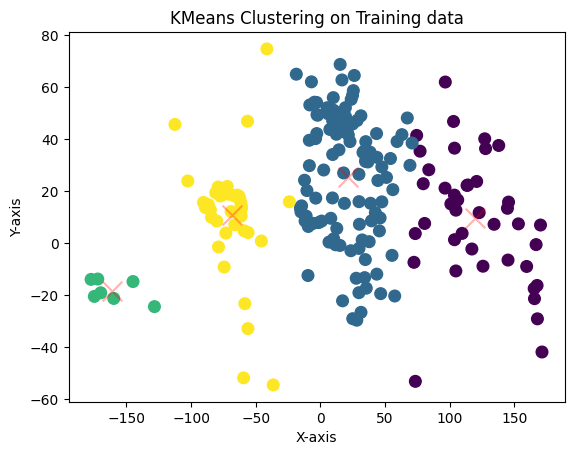

In [19]:
features, _ = prepare_data(km_df)

(centroids, labels) = kmeans(features, 4)
print(f'Centroids: \n{centroids}')

# plot
plt.scatter(features[:, 0], features[:, 1], c=labels, s=70, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.3, marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('KMeans Clustering on Training data')
plt.show()

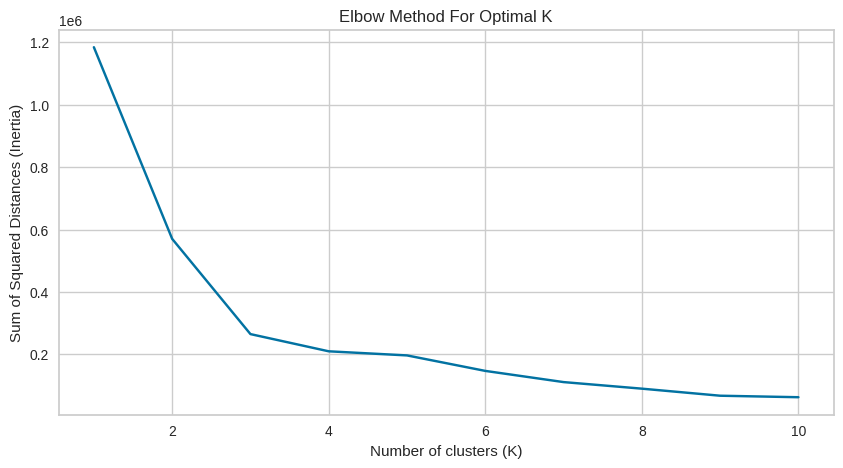

In [50]:
def compute_sse(X, labels, centroids):
    sse = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        sse += np.sum((cluster_points - centroids[k]) ** 2)
    return sse
def plot_elbow_method(features, max_k):
    sse = []
    for k in range(1, max_k+1):
        centroids, labels = kmeans(features, k)
        sse.append(compute_sse(features, labels, centroids))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k+1), sse, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Sum of Squared Distances (Inertia)')
    plt.title('Elbow Method For Optimal K')
    plt.grid(True)
    plt.show()

plot_elbow_method(features, 10)

**Giải thích:**

SSE là tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến centroid của cluster mà điểm đó thuộc về. SSE càng thấp, cụm càng chặt chẽ.

Quan sát đồ thị, tìm điểm khuỷu tay (điểm thay đổi phân chia rõ từ việc sse giảm nhanh xuống thành ổn định đều). Sau điểm này, tăng cụm lên ss3 không còn giảm đáng kể nữa.

Lý do là khi k tăng lên và vượt quá số cụm tự nhiên của dữ liệu, việc phân chia chỉ gây phân mảnh chứ không cải thiện độ chính xác.
=> Khuỷu tay thể hiện ở k=3.


In [37]:
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

def silhouette_samples(X, labels):
    distance_matrix = euclidean_distances(X)
    silhouette_samples = np.zeros(len(X))
    for idx in range(len(X)):
        current_mask = (labels == labels[idx])
        other_mask = (labels != labels[idx])

        a = np.mean(distance_matrix[idx, current_mask])

        b = np.min([np.mean(distance_matrix[idx, labels == other])
                    for other in set(labels) if other != labels[idx]])

        silhouette_samples[idx] = (b - a) / max(a, b)
    return silhouette_samples

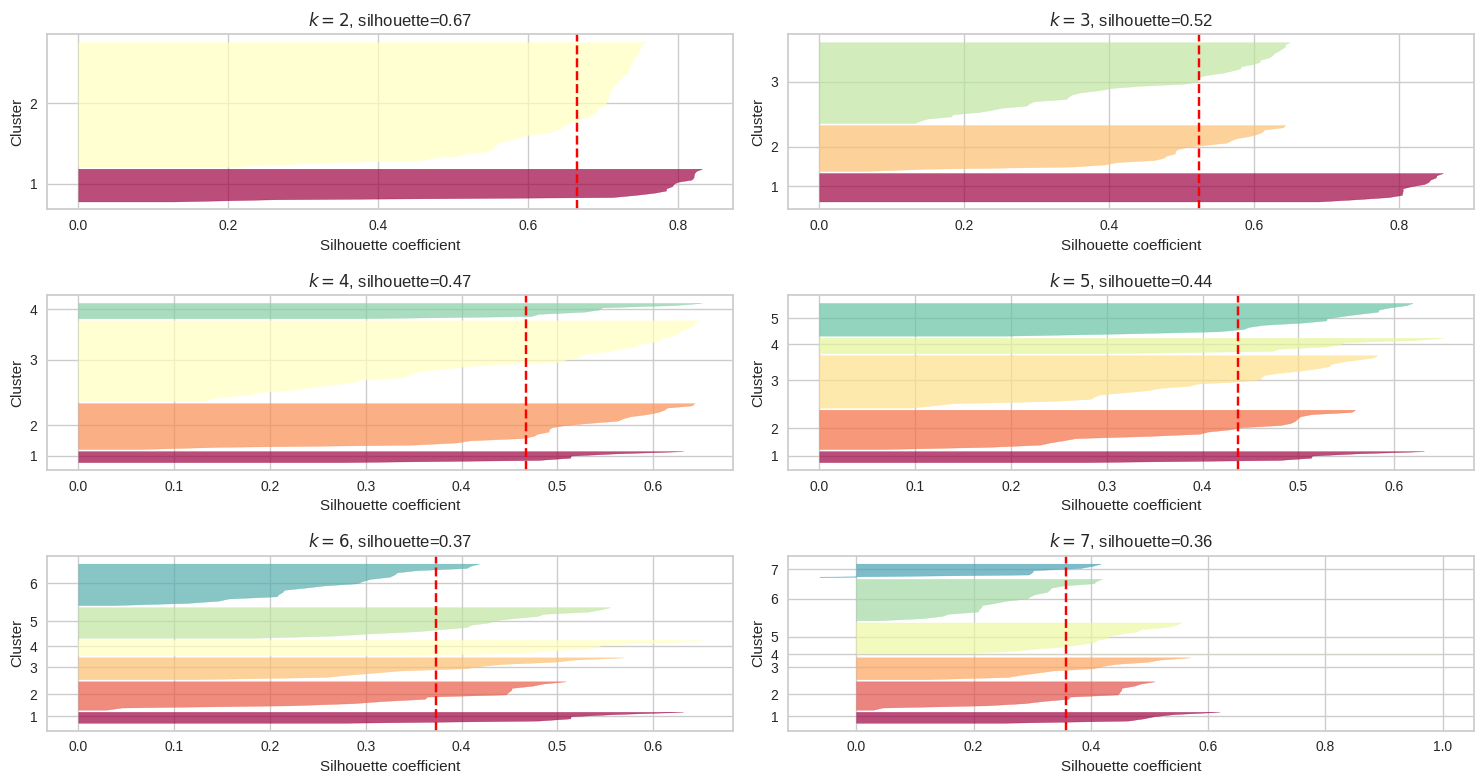

In [49]:
fig, axes = plt.subplots(3, 2, figsize=(15, 8))
ax = axes.ravel()
range_n_clusters = [2, 3, 4, 5, 6, 7]

for i, k in enumerate(range_n_clusters):
    centroids, cluster_labels = kmeans(X, k)
    silhouette_vals = silhouette_samples(X, cluster_labels)
    silhouette_avg = np.mean(silhouette_vals)

    y_lower, y_upper = 0, 0
    yticks = []
    for j in range(k):
        jth_cluster_silhouette_vals = silhouette_vals[cluster_labels == j]
        jth_cluster_silhouette_vals.sort()
        y_upper += len(jth_cluster_silhouette_vals)

        color = mpl.cm.Spectral(j / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                            0, jth_cluster_silhouette_vals,
                            facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(jth_cluster_silhouette_vals)

    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(np.arange(1, k + 1))
    ax[i].set_ylabel('Cluster')
    ax[i].set_xlabel('Silhouette coefficient')
    ax[i].set_title(f'$k={k}$, silhouette={silhouette_avg:.2f}')

plt.tight_layout()
plt.show()

**Giải thích:**

Silhouette Coef. = 1 khi gần trung tâm cụm và xa các cụm khác, = 0 khi gần biên cấc cụm, = -1 khi phân sai cụm. Được thực hiện hóa bằng công thức: s = (b-a)/max(a,b) với a là khoảng cách trung bình từ 1 điểm đển các điểm khác trong cùng cụm (đo mức dày đặc của cụm) còn b là khoảng cách trung bình từ một điểm đến các điểm trong cụm gần nhất mà điểm đó không thuộc về (đo kích thước các cụm).

k tối ưu khi s cao nhất.

**Nhận xét khi view kết quả**

k=2: Giá trị Silhouette trung bình là 0.67, cao nhất trong số các trường hợp. Tuy nhiên, chỉ có hai cụm được xét đến, có thể không đủ để phân đoạn dữ liệu phức tạp.
k=3: Giá trị Silhouette trung bình giảm xuống còn 0.52, vẫn còn khá cao, nhưng một trong ba cụm có phân bố Silhouette hẹp và giá trị thấp hơn, điều này chỉ ra rằng cụm đó có sự không đồng đều.
k=4 và k=5: Cả hai giá trị trung bình lần lượt là 0.47 và 0.44, cho thấy sự phân chia không còn tốt như các trường hợp trước. Cụ thể, một số cụm có phạm vi rất hẹp và giá trị thấp, điều này cho thấy chất lượng phân cụm giảm.

Trong trường hợp này, k=3 có vẻ là lựa chọn tối ưu nhất. Mặc dù k=2 có giá trị Silhouette trung bình cao nhất, nhưng nó có thể quá thô để phân đoạn dữ liệu hiệu quả. Với k=3, mặc dù có một cụm có chất lượng thấp hơn, sự cân bằng giữa số lượng cụm và chất lượng phân chia có vẻ hợp lý nhất.

Centroids: 
[[119.9    9.65]
 [ 20.31  25.99]
 [-83.73   5.08]]


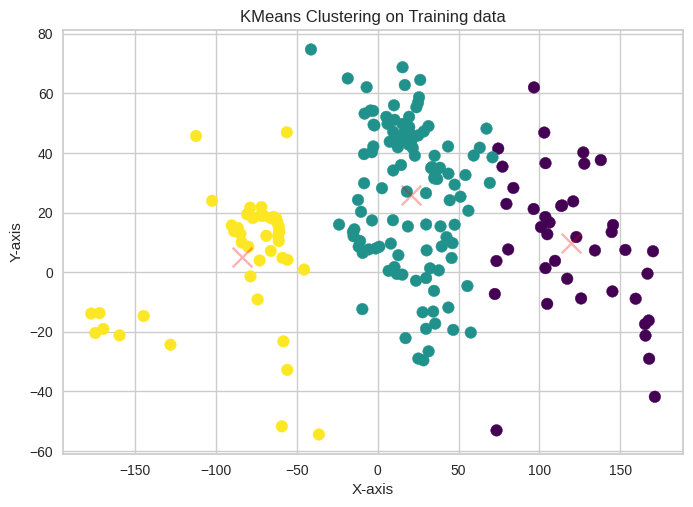

In [52]:
# run with optimal k
features, _ = prepare_data(km_df)

(centroids, labels) = kmeans(features, 3)
print(f'Centroids: \n{centroids}')

# plot
plt.scatter(features[:, 0], features[:, 1], c=labels, s=70, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.3, marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('KMeans Clustering on Training data')
plt.show()